In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Preparation and Data Reading

In [24]:
def performance_representation_plot(data_predictions_array, data_truth_array, title,
                                    title_in_plot=True, save_file=False, print_plot=True, upper_border=True, legend_font_size="medium",
                                    axis_value_size="medium", axis_label_size="medium"):
    
    if(data_predictions_array.max() > 1):
        data_predictions_array/= data_predictions_array.max()
        data_truth_array/= data_predictions_array.max()
    
    if(data_truth_array.max() > 1):
        data_predictions_array/= data_truth_array.max()
        data_truth_array/= data_truth_array.max()
        
    fig = plt.figure(figsize=(30,10))
    plt.xlabel("Horas", fontdict={"fontsize":axis_label_size})
    plt.tick_params(axis="both", labelsize=axis_value_size)
    plt.title(title) if title_in_plot else print(title)
    plt.ylabel("Viagens requisitadas por hora", fontdict={"fontsize":axis_label_size})
    plt.yticks(ticks=[1.0, 0.8, 0.6, 0.4, 0.2, 0.0], labels=["1,0", "0,8", "0,6", "0,4" , "0,2", "0,0"])
    plt.ylim(top=1, bottom=0)
    plt.plot(data_truth_array, "ok", label="Valores Reais")
    plt.plot(data_predictions_array, "--b", label="Valores Previstos")
    if(not upper_border):
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.legend(fontsize=legend_font_size, loc=1)
    plt.savefig("plots\\" + title.replace(" ", "_")+ ".png", bbox_inches='tight') if save_file else print()
    plt.show() if print_plot else print()

In [25]:
evo_data = np.loadtxt(r"results/LSTM_Evo Multivariable_Predictions_by12Hrs.txt", delimiter=",")
evo_results = pd.read_csv(r"results/LSTM_Evo Multivariable_Results.txt")

evo_data_single_var = np.loadtxt(r"results/LSTM_Evo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
evo_results_single_var = pd.read_csv(r"results/LSTM_Evo_Single_Variable_Results.txt")

modo_data = np.loadtxt(r"results/LSTM_Modo Multivariable_Predictions_by12Hrs.txt", delimiter=",")
modo_results = pd.read_csv(r"results/LSTM_Modo Multivariable_Results.txt")

modo_data_single_var = np.loadtxt(r"results/LSTM_Modo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
modo_results_single_var = pd.read_csv(r"results/LSTM_Modo_Single_Variable_Results.txt")

c2g_data = np.loadtxt(r"results/LSTM_Car2Go Multivariable_Predictions_by12Hrs.txt", delimiter=",")
c2g_results = pd.read_csv(r"results/LSTM_Car2Go Multivariable_Results.txt")

c2g_data_single_var = np.loadtxt(r"results/LSTM_Car2Go_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
c2g_results_single_var = pd.read_csv(r"results/LSTM_Car2Go_Single_Variable_Results.txt")

## Plot Generation

In [26]:
plot_styling = {
    "title_in_plot":False,
    "save_file":True,
    "print_plot":True,
    "upper_border":False,
    "legend_font_size":36,
    "axis_value_size":32,
    "axis_label_size":34
}

Evo Multivariable


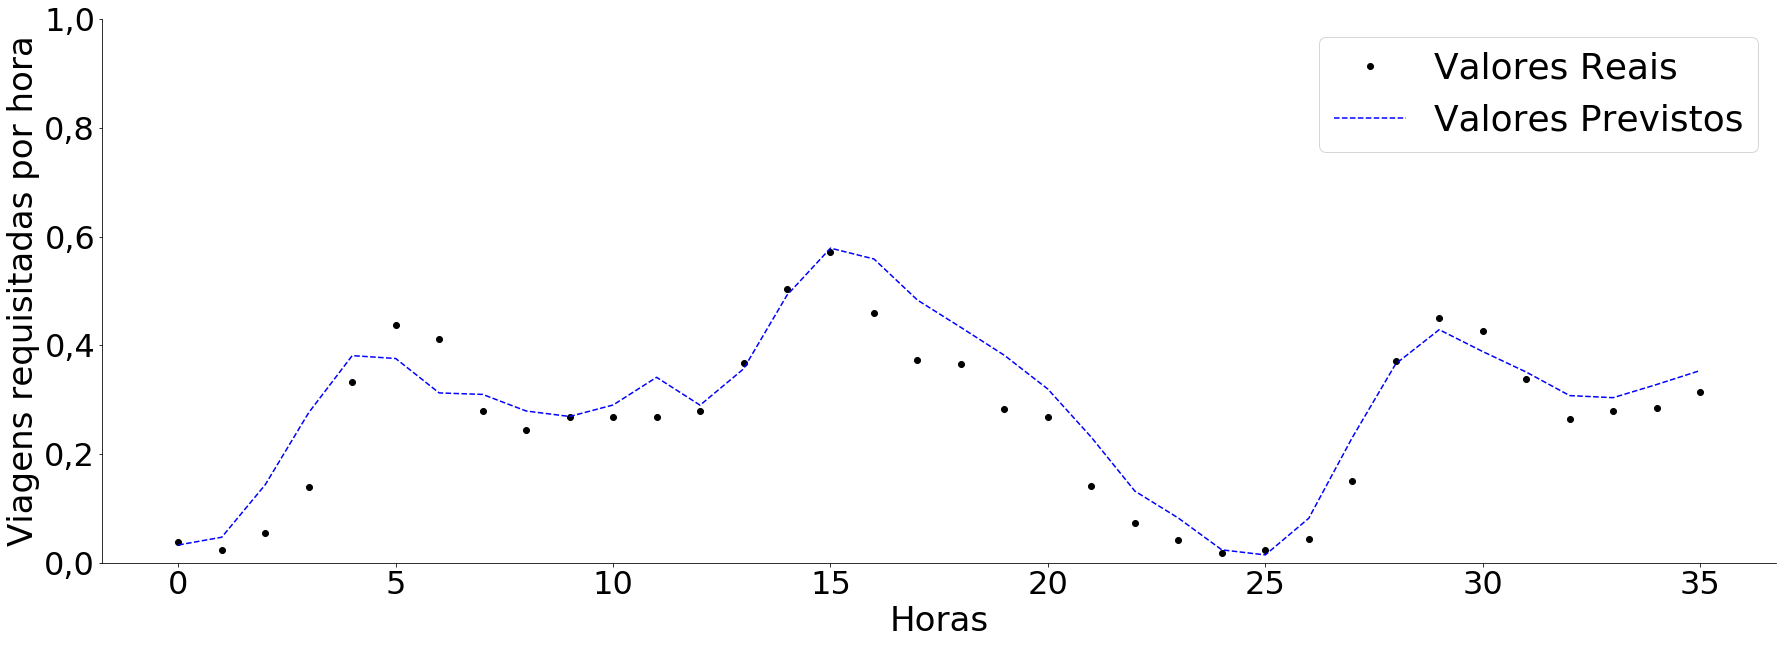

Evo Univariable


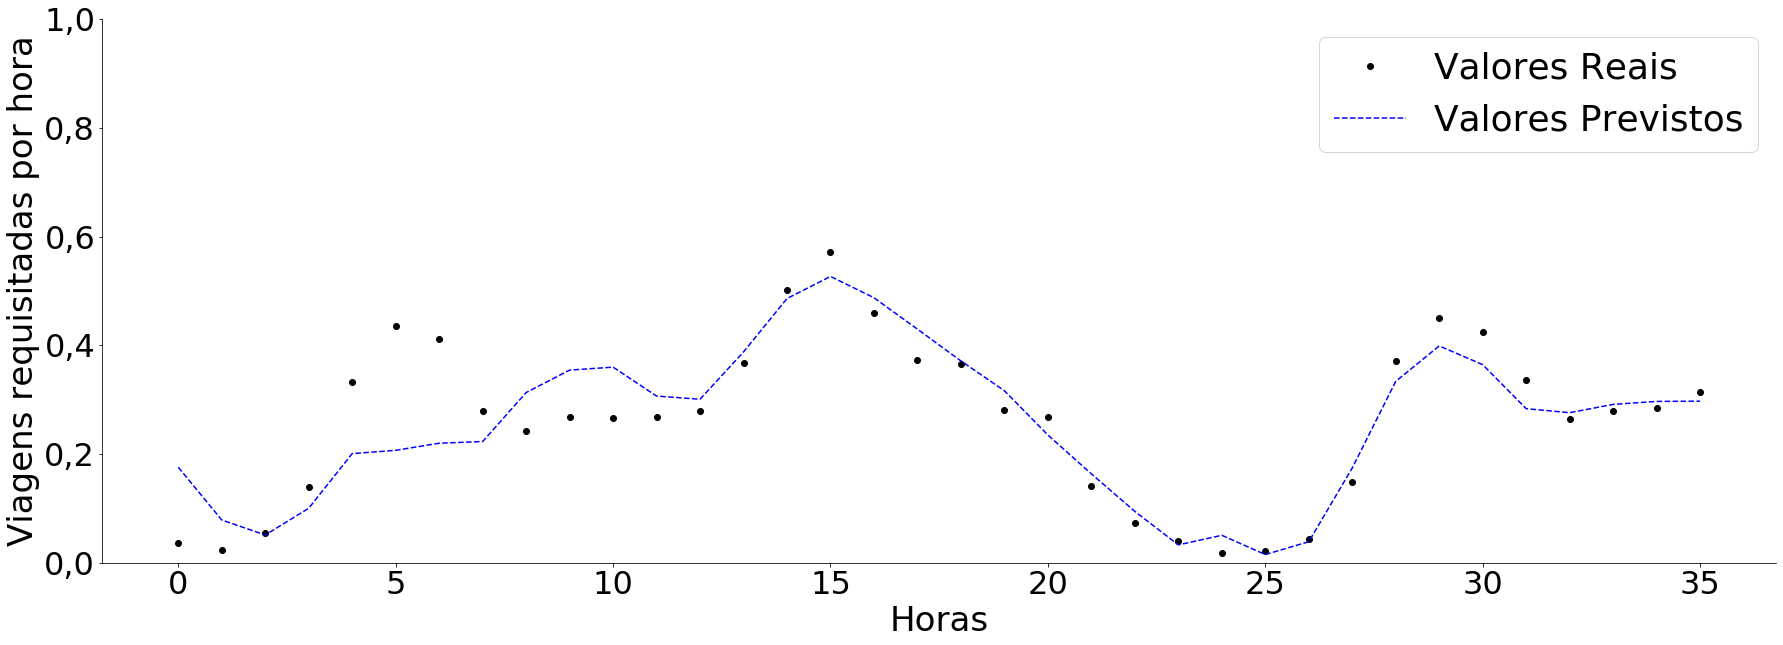

Modo Multivariable


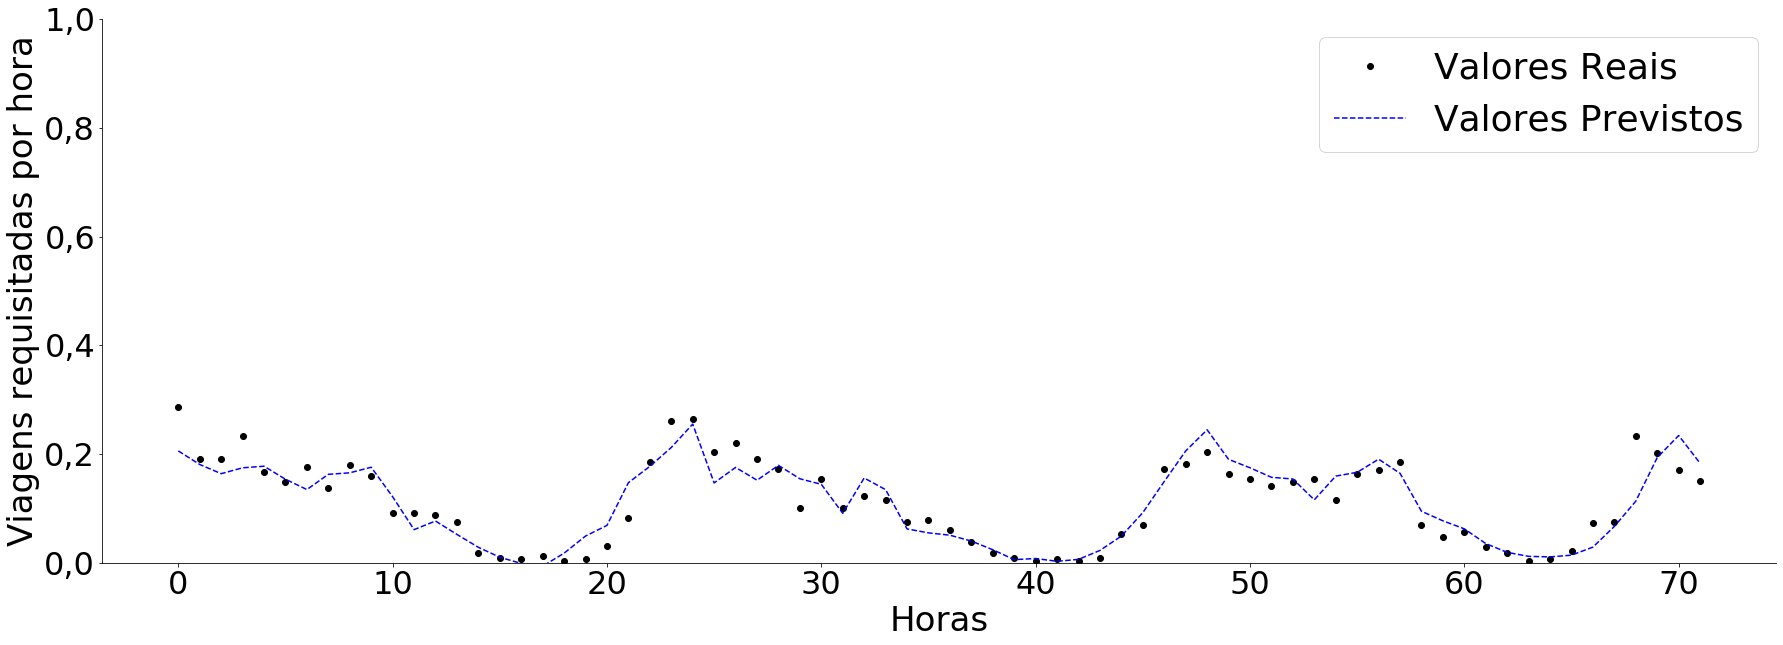

Modo Univariable


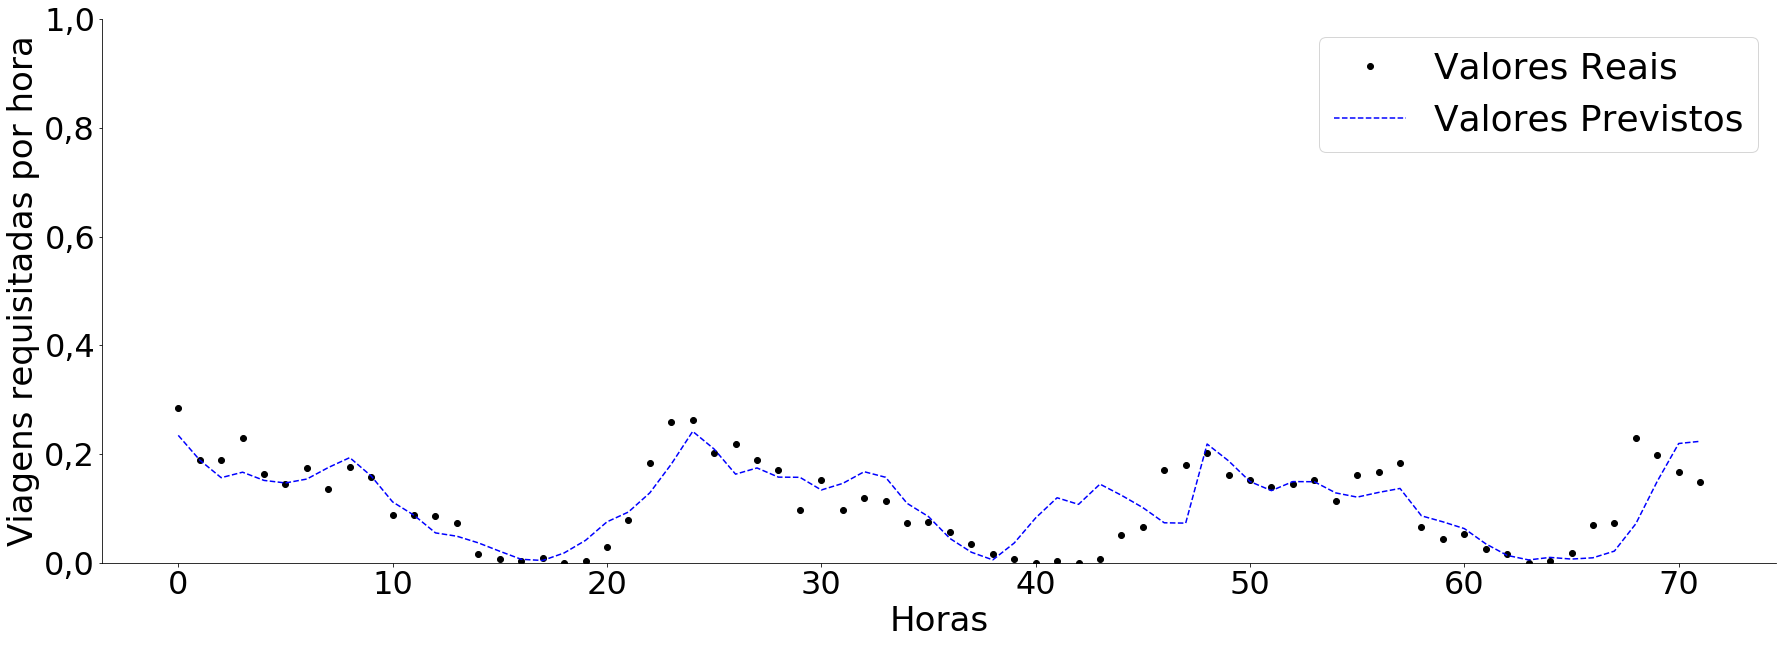

Car2Go Multivariable


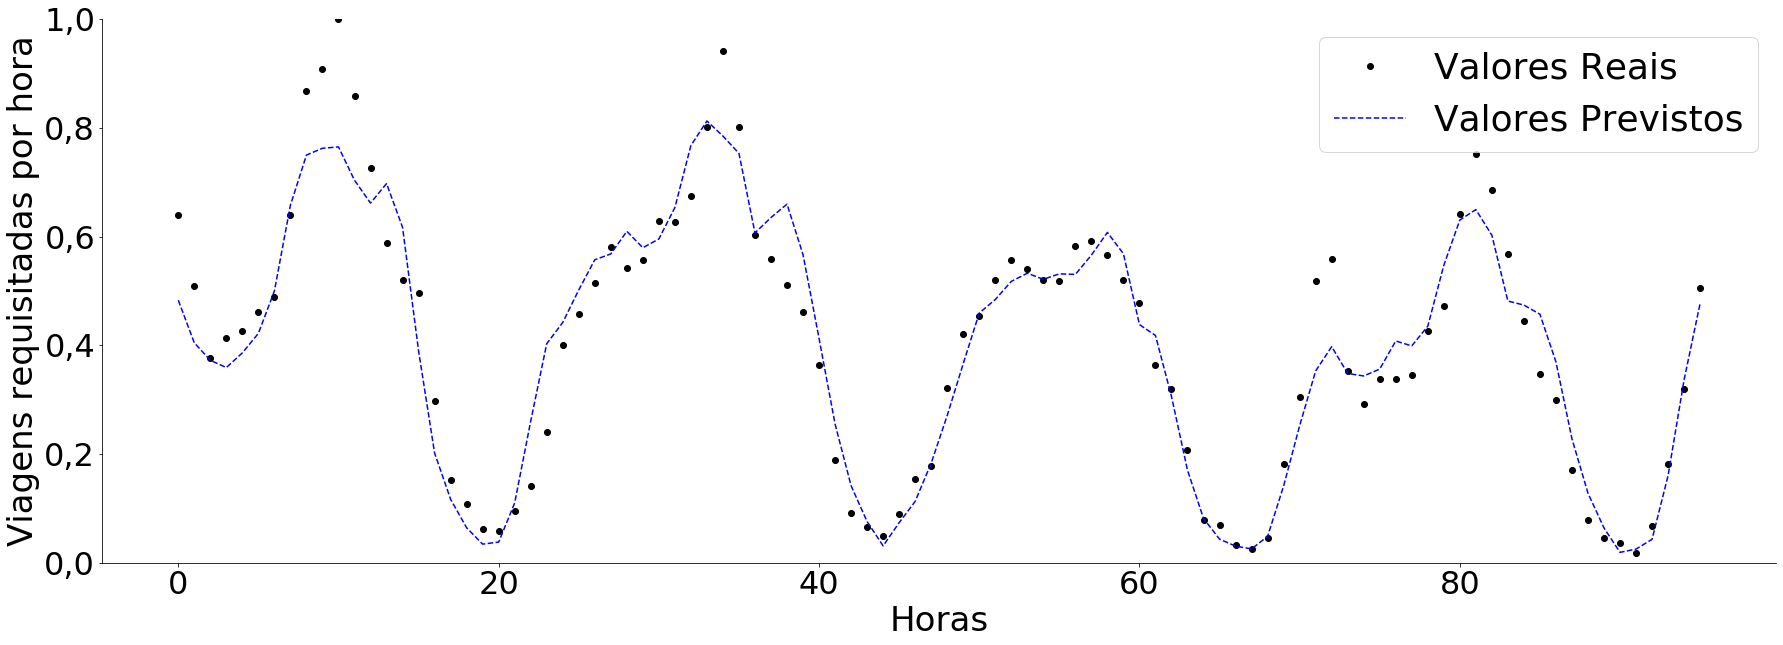

Car2Go Univariable


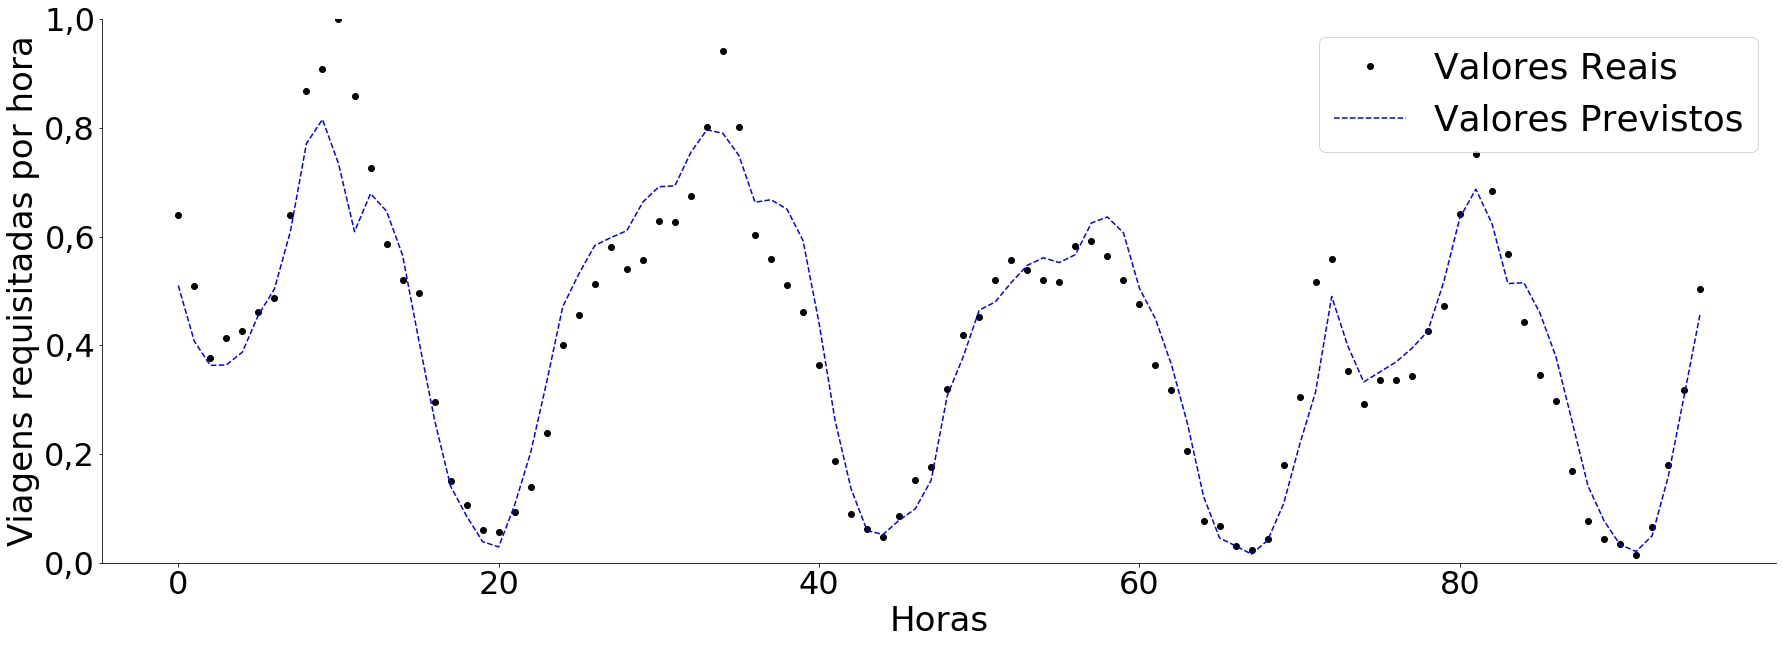

In [27]:
performance_representation_plot(evo_data[0], evo_data[1], "Evo Multivariable", **plot_styling)
performance_representation_plot(evo_data_single_var[0], evo_data_single_var[1], "Evo Univariable", **plot_styling)
performance_representation_plot(modo_data[0], modo_data[1], "Modo Multivariable", **plot_styling)
performance_representation_plot(modo_data_single_var[0], modo_data_single_var[1], "Modo Univariable", **plot_styling)
performance_representation_plot(c2g_data[0], c2g_data[1], "Car2Go Multivariable", **plot_styling)
performance_representation_plot(c2g_data_single_var[0], c2g_data_single_var[1], "Car2Go Univariable", **plot_styling)